In [28]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable

sn.set_context('notebook')

# TOC trends map

Heleen would like some maps illustrating TOC trends - see e-mails received 16/08/2017 at 10.51 and 11.05 for details. As a starting point, I have copied the attachment in Heleen's e-mail from 11:05 and have simplified the column headings.

In [3]:
# Read data
in_xlsx = (r'C:\Data\James_Work\Staff\Heleen_d_W\ICP_Waters\TOC_Trends_Analysis_2015'
           r'\Trends_Maps\heleen_toc_trends_data.xlsx')
df = pd.read_excel(in_xlsx)

df.head()

,continent,region,lat,lon,p_val,trend,slp,rel_slp
0,EUR,4_Atl_EUR,59.977669,10.152037,0.000880,increasing,0.116569,0.019428
1,EUR,5_Bo_Eur,60.107202,10.757415,0.000467,increasing,0.064706,0.018487
2,EUR,5_Bo_Eur,59.775661,11.773188,0.000003,increasing,0.100000,0.027397
3,EUR,4_Atl_EUR,58.685067,8.962033,0.000717,increasing,0.170000,0.022973
4,EUR,5_Bo_Eur,59.402993,10.998982,0.000001,increasing,0.257059,0.055281


In [30]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    From here:
    https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
    
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    from mpl_toolkits.axes_grid1 import AxesGrid

    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

## 1. Absolute trends

### 1.1. North America

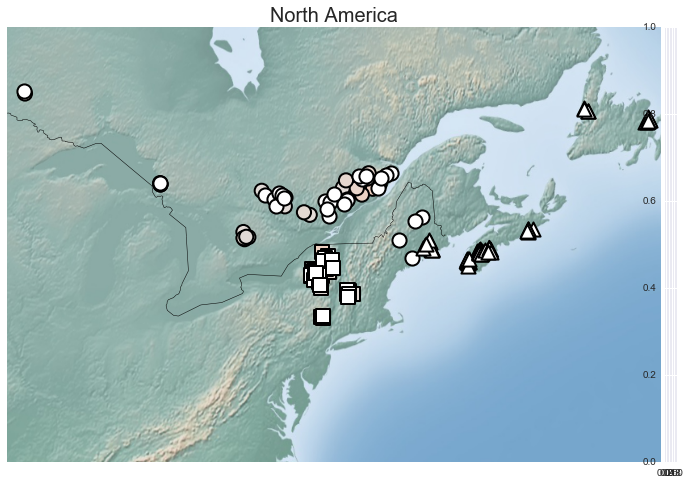

In [37]:
# Get max and min slopes for colour scale
vmin = df['slp'].min()
vmax = df['slp'].max() 

# Build colourmap for later
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap = shiftedColorMap(orig_cmap, 
                               #start=min_slp, 
                               midpoint=(1 - (vmax/(vmax + abs(vmin)))), 
                               #stop=max_slp, 
                               name='shifted')

# Dict for marker styles and region names
mark_dict = {'1_Bo_NA':['o', 'Boreal North America'],
             '2_Temp_NA':['s', 'Temperate North America'],
             '3_Atl_NA':['^', 'Atlantic North America'],
             '4_Atl_EUR':['^', 'Atlantic Europe'],
             '5_Bo_Eur':['o', 'Boreal Europe'],
             '6_Temp_Eur':['s', 'Temperate Europe']}

# Setup map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_title('North America', fontsize=20)

# Use a Lambert Conformal Conic projection
m = Basemap(projection='lcc', resolution='i',
            lon_0=-73.8, lat_0=45, lat_1=40, lat_2=50,
            width=3E6, height=2E6)

m.shadedrelief()
m.drawcountries(linewidth=0.5)

# Loop over dataets
for reg in mark_dict.keys():
    for tr in ['increasing', 'decreasing', 'no trend']:
        # Get data
        df1 = df.query('(region==@reg) and (trend==@tr)')

        # Map (long, lat) to (x, y) for plotting
        x, y = m(df1['lon'].values, df1['lat'].values)
        
        if tr == 'no trend':
            plt.scatter(x, y, 
                        c='white', 
                        marker=mark_dict[reg][0],
                        s=200,
                        lw=2,
                        label=mark_dict[reg][1])
        else:
            plt.scatter(x, y, 
                        c=df1['slp'].values, 
                        marker=mark_dict[reg][0],
                        s=200,
                        lw=2,
                        cmap=shifted_cmap, 
                        vmin=min_slp, 
                        vmax=max_slp,
                        label=mark_dict[reg][1])

# Add colourbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
#plt.colorbar(cax=cax)

#plt.legend(loc='lower right', frameon=True, fontsize=14)

In [38]:
vmax

0.69772727300000004